In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

# Read in the dataframes

In [4]:
validation_filings_df = pd.read_csv('data/nc_validation_filings (1).csv')

In [5]:
validation_filings_df.head()

,ticker,accession_number
0,ACAD,0001564590-18-003526
1,ACC,0001283630-18-000024
2,AFSI,0001365555-18-000052
3,AHL,0001267395-18-000024
4,AKRX,0001628280-18-002518


In [6]:
validation_filings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
ticker              100 non-null object
accession_number    100 non-null object
dtypes: object(2)
memory usage: 1.6+ KB


In [7]:
validation_filings_df.describe()

,ticker,accession_number
count,100,100
unique,100,100
top,VREX,0001301611-18-000005
freq,1,1


In [8]:
share_rprchs_prgrph_df = pd.read_csv('data/share_repurchase_paragraphs.csv')

In [9]:
share_rprchs_prgrph_df.head()

,ticker,accession_number,data_key_friendly_name,text,data_value,reported_data_value,reported_units,paragraph_text
0,A,0001090872-17-000018,Share Repurchase Authorization Date,"May 28, 2015",20150528,20200000.00,ones,"On May 28, 2015 we announced that our board ..."
1,A,0001090872-17-000018,Share Repurchase Authorization,The 2015 share repurchase program authorizes t...,1140000000,1.14,billions,"On May 28, 2015 we announced that our board ..."
2,A,0001090872-17-000018,Share Repurchase Intention,remaining authorization to repurchase up to,610000000,610.00,millions,"Table of Contents 2016, upon the completion ..."
3,A,0001090872-17-000018,Share Repurchase Count,repurchased,4100000,4.10,millions,"Table of Contents 2016, upon the completion ..."
4,A,0001090872-17-000018,Amount Spent on Share Repurchases,repurchased,194000000,194.00,millions,"Table of Contents 2016, upon the completion ..."


In [10]:
share_rprchs_prgrph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 8 columns):
ticker                    1781 non-null object
accession_number          1781 non-null object
data_key_friendly_name    1781 non-null object
text                      1781 non-null object
data_value                1781 non-null int64
reported_data_value       1781 non-null float64
reported_units            1781 non-null object
paragraph_text            1781 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 111.4+ KB


In [11]:
share_rprchs_prgrph_df.describe()

,data_value,reported_data_value
count,1.781000e+03,1.781000e+03
mean,1.928350e+09,4.547086e+06
std,1.144201e+10,8.416679e+06
min,3.000000e+02,1.000000e-01
25%,2.016092e+07,7.100000e+00
50%,1.820000e+08,3.000000e+02
75%,1.000000e+09,1.966450e+05
max,3.212210e+11,2.020000e+07


In [12]:
share_rprchs_prgrph_df.isnull().sum()

ticker                    0
accession_number          0
data_key_friendly_name    0
text                      0
data_value                0
reported_data_value       0
reported_units            0
paragraph_text            0
dtype: int64

# EDA - Exploratory Data Analysis

In [13]:
for col in share_rprchs_prgrph_df.columns:
    print(col, 'unique values:____________________')
    print(share_rprchs_prgrph_df[col].unique())

ticker unique values:____________________
['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AES' 'AET' 'AFL' 'AGN' 'AGRO' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMG' 'AMGN'
 'AMP' 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC' 'APD'
 'APH' 'APTV' 'ARNC' 'ATVI' 'AVB' 'AVY' 'AWK' 'AXP' 'AYI' 'AZO' 'BA'
 'BABA' 'BAC' 'BAX' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BHGE' 'BIIB' 'BK'
 'BKNG' 'BLK' 'BLL' 'BMY' 'BSX' 'BWA' 'C' 'CA' 'CAG' 'CAH' 'CAKE' 'CAT'
 'CB' 'CBOE' 'CBRE' 'CBS' 'CCI' 'CCL' 'CDNS' 'CELG' 'CERN' 'CFG' 'CHD'
 'CHK' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA' 'CMG' 'CMI'
 'CNC' 'COF' 'COG' 'COL' 'COO' 'COP' 'COST' 'COTY' 'CPB' 'CSCO' 'CSX'
 'CTAS' 'CTSH' 'CTXS' 'CVS' 'CVX' 'D' 'DAL' 'DE' 'DFS' 'DG' 'DGX' 'DHI'
 'DHR' 'DIS' 'DISCA' 'DISH' 'DLTR' 'DOV' 'DPS' 'DRE' 'DRI' 'DVA' 'DWDP'
 'EA' 'EBAY' 'ECL' 'EFX' 'EL' 'EMN' 'EMR' 'EOG' 'EQR' 'EQT' 'ESRX' 'ESS'
 'ETFC' 'ETN' 'ETR' 'EVHC' 'EW' 

['On May 28, 2015 we  announced that our board  of directors had approved a  new share repurchase program  (the   "2015 repurchase program"). The 2015 share repurchase program authorizes the purchase of up to $1.14  billion   of our common stock at the company\'s discretion  through and including November 1, 2018. The 2015  repurchase   program does  not require  the company  to  acquire a  specific number  of  shares and  may be  suspended  or   discontinued at any time. During the year ended October 31,                                                        95'
 'Table of Contents   2016, upon the completion of our previous repurchase program, we repurchased approximately 8.3 million shares   for $336  million  under  this  authorization.  During  the  year  ended  October  31,  2017  we  repurchased   approximately 4.1 million shares for $194  million under this authorization. As  of October 31, 2017, we  had   remaining authorization to repurchase up to $610 million of our common s

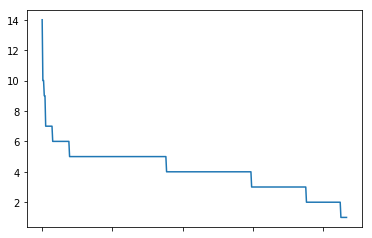

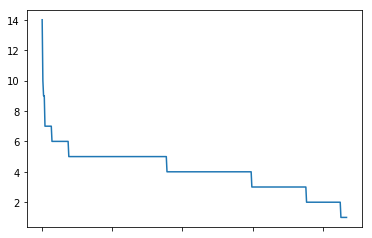

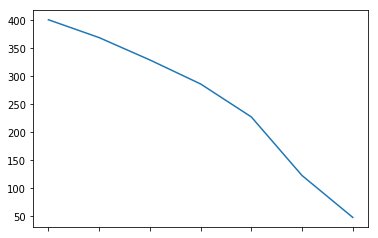

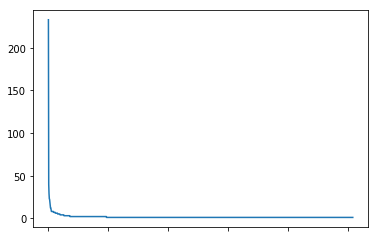

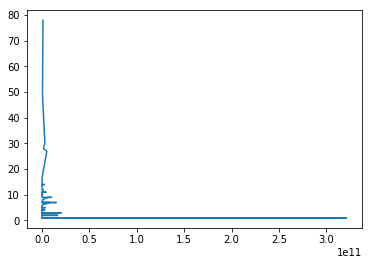

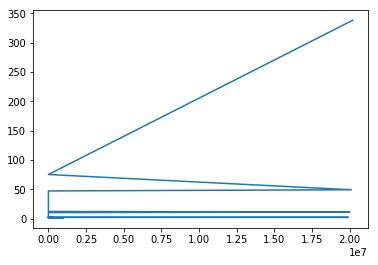

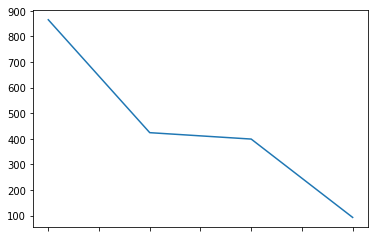

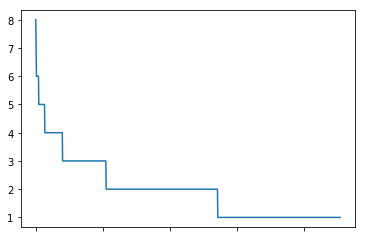

In [14]:
for col in share_rprchs_prgrph_df.columns:
    share_rprchs_prgrph_df[col].value_counts().plot()
    plt.show()

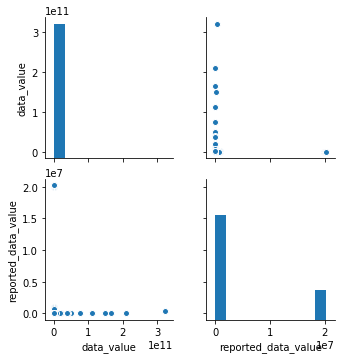

In [15]:
sns.pairplot(share_rprchs_prgrph_df)

In [17]:
share_rprchs_prgrph_df

,ticker,accession_number,data_key_friendly_name,text,data_value,reported_data_value,reported_units,paragraph_text
0,A,0001090872-17-000018,Share Repurchase Authorization Date,"May 28, 2015",20150528,20200000.00,ones,"On May 28, 2015 we announced that our board ..."
1,A,0001090872-17-000018,Share Repurchase Authorization,The 2015 share repurchase program authorizes t...,1140000000,1.14,billions,"On May 28, 2015 we announced that our board ..."
2,A,0001090872-17-000018,Share Repurchase Intention,remaining authorization to repurchase up to,610000000,610.00,millions,"Table of Contents 2016, upon the completion ..."
3,A,0001090872-17-000018,Share Repurchase Count,repurchased,4100000,4.10,millions,"Table of Contents 2016, upon the completion ..."
4,A,0001090872-17-000018,Amount Spent on Share Repurchases,repurchased,194000000,194.00,millions,"Table of Contents 2016, upon the completion ..."
5,AAL,0000006201-18-000009,Share Repurchase Authorization Date,July 2014,20140715,20100000.00,ones,4. Share Repurchase Programs and Dividends S...
6,AAL,0000006201-18-000009,Share Repurchase Authorization,share repurchase programs aggregating,11000000000,11.00,billions,4. Share Repurchase Programs and Dividends S...
7,AAL,0000006201-18-000009,Share Repurchase Intention,remained unused under a repurchase program,450000000,450.00,millions,4. Share Repurchase Programs and Dividends S...
8,AAL,0000006201-18-000009,Share Repurchase Count,repurchased,33900000,33.90,millions,"During the year ended December 31, 2017, we ..."
9,AAL,0000006201-18-000009,Amount Spent on Share Repurchases,repurchased,1600000000,1.60,billions,"During the year ended December 31, 2017, we ..."


In [26]:
share_rprchs_prgrph_df.ticker.value_counts()

AAPL     14
STZ      10
NLSN     10
LRCX      9
CTSH      9
PHM       7
MCK       7
BAX       7
APC       7
BKNG      7
PEP       7
PFE       7
CCL       7
ANDV      7
BMY       7
RTN       6
ABT       6
DGX       6
XLNX      6
ALK       6
PSX       6
EBAY      6
GOOGL     6
AMAT      6
JWN       6
TJX       6
TXN       6
INFO      6
SRE       6
WHR       6
         ..
PH        2
AMZN      2
PSA       2
VZ        2
PBCT      2
APA       2
HIG       2
LYB       2
NEE       2
TWX       2
DISH      2
KLAC      2
L         2
MCHP      2
WEC       2
EQR       2
F         2
WYNN      2
CHRW      2
DOV       2
URI       2
HAL       1
FLR       1
DLTR      1
LUK       1
FAST      1
GWW       1
HCP       1
AIV       1
LAKE      1
Name: ticker, Length: 434, dtype: int64

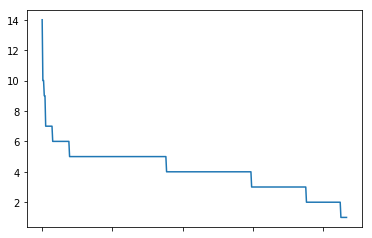

In [25]:
share_rprchs_prgrph_df.ticker.value_counts().plot()
plt.show()

In [23]:
list(enumerate(set(share_rprchs_prgrph_df.data_key_friendly_name)))

[(0, 'Share Repurchase Authorization Date'),
 (1, 'Share Repurchase Utilization'),
 (2, 'Share Repurchase Count'),
 (3, 'Unknown Share Repurchase Data'),
 (4, 'Amount Spent on Share Repurchases'),
 (5, 'Share Repurchase Intention'),
 (6, 'Share Repurchase Authorization')]

In [27]:
share_rprchs_prgrph_df.data_key_friendly_name.value_counts()

Share Repurchase Authorization Date    401
Share Repurchase Authorization         369
Amount Spent on Share Repurchases      329
Share Repurchase Count                 286
Share Repurchase Intention             227
Unknown Share Repurchase Data          122
Share Repurchase Utilization            47
Name: data_key_friendly_name, dtype: int64

In [31]:
for i in range(1, len(share_rprchs_prgrph_df[0:10])):
    print('------------------------------------')
    print(share_rprchs_prgrph_df['ticker'][i])
    print (share_rprchs_prgrph_df['data_key_friendly_name'][i])
    print('')
    print(share_rprchs_prgrph_df['text'][i])
    print('')
    print(share_rprchs_prgrph_df['paragraph_text'][i])
    print('')

------------------------------------
A
Share Repurchase Authorization

The 2015 share repurchase program authorizes the purchase of up to

On May 28, 2015 we  announced that our board  of directors had approved a  new share repurchase program  (the   "2015 repurchase program"). The 2015 share repurchase program authorizes the purchase of up to $1.14  billion   of our common stock at the company's discretion  through and including November 1, 2018. The 2015  repurchase   program does  not require  the company  to  acquire a  specific number  of  shares and  may be  suspended  or   discontinued at any time. During the year ended October 31,                                                        95

------------------------------------
A
Share Repurchase Intention

remaining authorization to repurchase up to

Table of Contents   2016, upon the completion of our previous repurchase program, we repurchased approximately 8.3 million shares   for $336  million  under  this  authorization.  Du

In [33]:
len(share_rprchs_prgrph_df.accession_number.unique())

435